In [788]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from collections import Counter

from imblearn.over_sampling import RandomOverSampler

from keras.models import Sequential
from keras.layers import Dense, Dropout


### Read the data from github repository and drop uniqe values from it, also combining colunms which are related each other

In [789]:
csv_file = 'smoking.csv'
df = pd.read_csv(csv_file)
pd.set_option('display.max_columns', None)
##missing_count = df.isna().sum()  0
##print(missing_count)   0

#No need id because it is unique to everyone
df = df.sort_values(by = 'ID')
df = df.drop(['ID'], axis = 1)
df = df.drop(['gender'], axis=1)
## No need for oral column since every value is 1
df = df.drop(['oral'], axis = 1)
df = df[(df['age'] <= 80) & (df['age'] >= 25)]
## Encode
label_encoder = preprocessing.LabelEncoder()
df['tartar'] = label_encoder.fit_transform(df['tartar'])

### Fix the blind values for eyesight, then combine eyesight

In [790]:
## Combine left and right eyesight and hearing
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']

# 9.9 is status of blind so we replace it with 0
df[columns_to_replace] = df[columns_to_replace].replace(9.9, 0)
df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [791]:
#Describe data to look is there any outlayer values
df.describe()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.00000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000
mean,44.889407,164.439359,65.712661,82.078414,121.546660,76.073328,99.54838,197.591785,127.508415,57.279942,115.515498,14.591029,1.088197,0.883516,26.228899,27.084277,40.288245,0.210848,0.555704,0.363145,0.990449,1.026446
std,11.478872,9.193927,12.818279,9.292315,13.745853,9.714546,20.96471,36.267045,71.896822,14.793724,41.148699,1.568144,0.407581,0.222918,19.391879,31.199358,50.806714,0.407915,0.496892,0.480911,0.300290,0.139331
min,25.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.00000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40.000000,155.000000,55.000000,76.000000,112.000000,70.000000,89.00000,173.000000,75.000000,47.000000,92.000000,13.600000,1.000000,0.700000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.00000,196.000000,108.000000,55.000000,113.000000,14.700000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.00000,220.000000,161.000000,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,80.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.00000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Pieplot

<AxesSubplot: ylabel='smoking'>

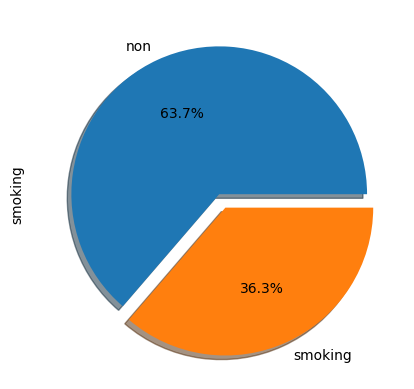

In [792]:

df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

## CatPlot

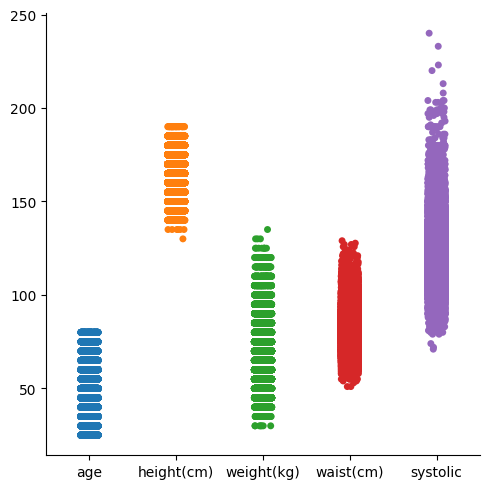

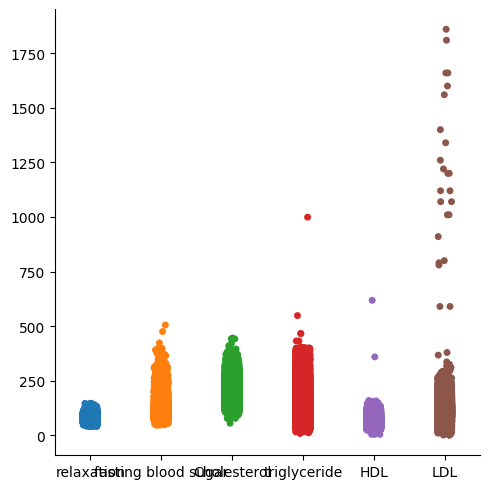

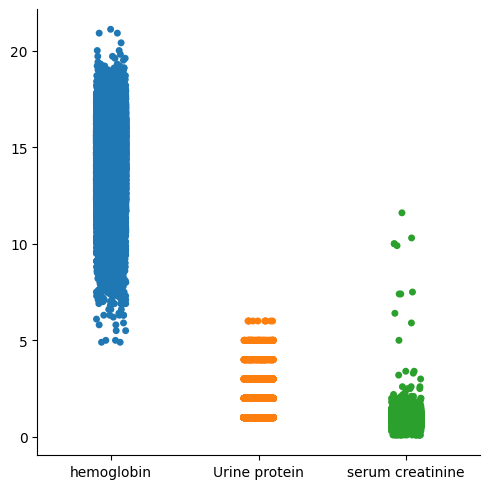

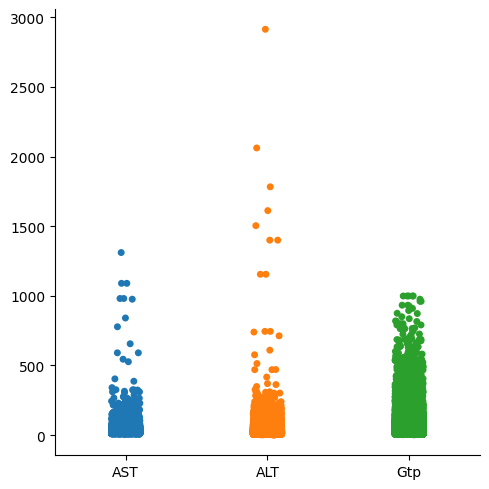

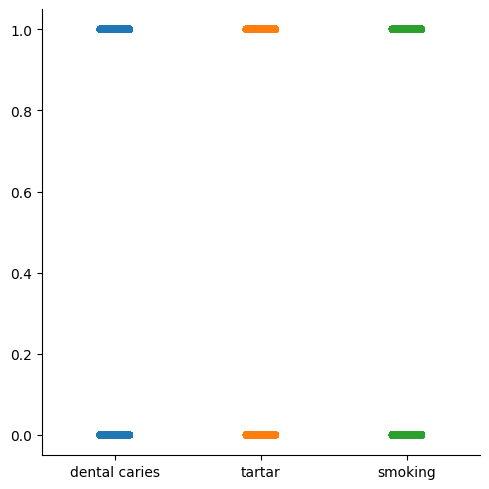

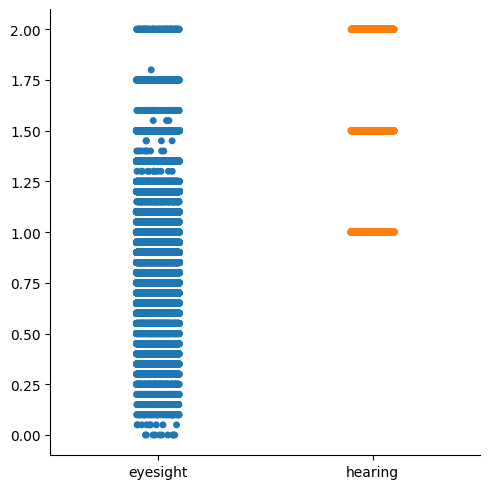

In [793]:
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:11])
sns.catplot(df.iloc[:, 11:14])
sns.catplot(df.iloc[:, 14:17])
sns.catplot(df.iloc[:, 17:20])
sns.catplot(df.iloc[:, 20:22])

## HeatMap

<AxesSubplot: >

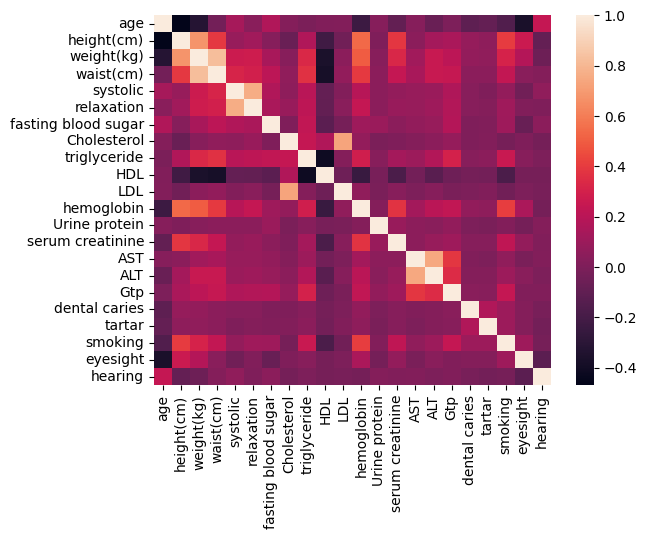

In [794]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

## Correaliton map with number to understand feature effects more clear

Text(0.5, 1.0, 'Correlation Heatmap')

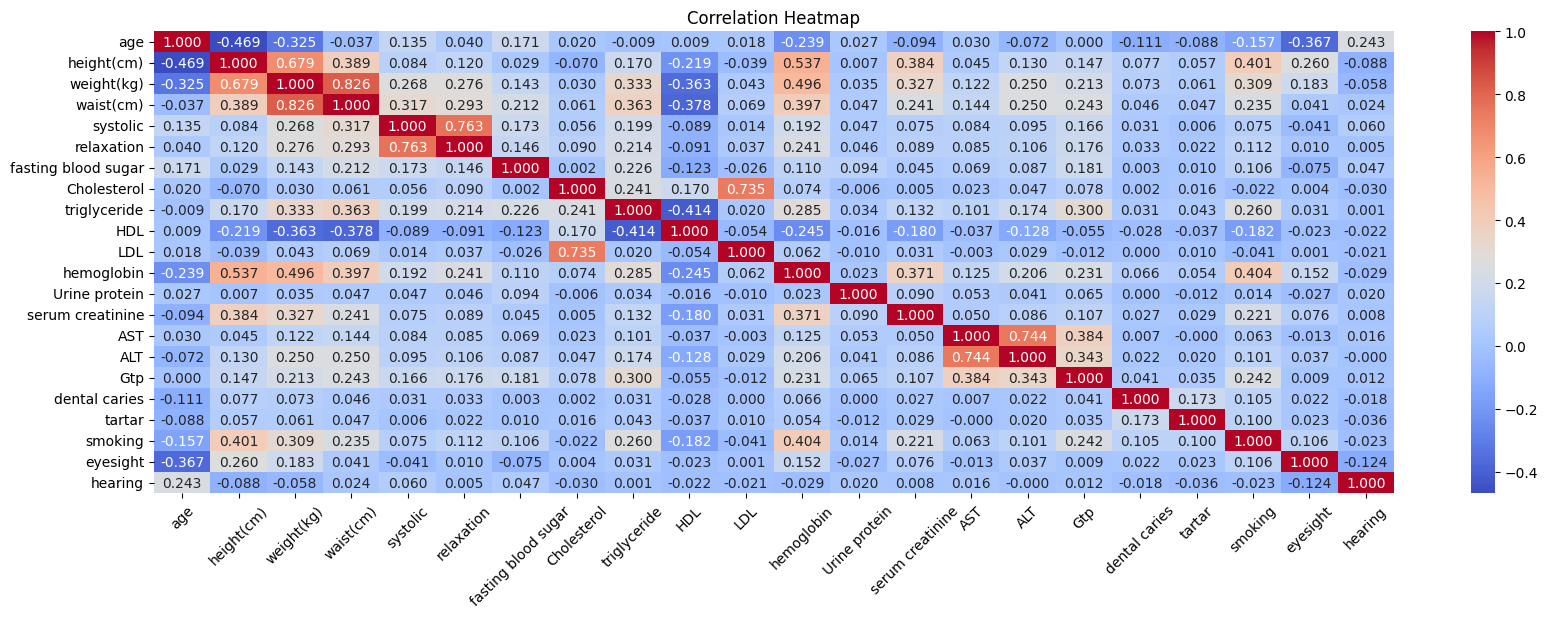

In [795]:
correlation_matrix = df.corr()
column_names = df.columns.tolist()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 6))
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)
plt.title('Correlation Heatmap')

### Using quantile (IQR) method to get rid of outliers in the dataset

In [796]:

import numpy as np
num_columns = df.shape[0]
new_df = df.drop(columns=['Urine protein']).copy()
print("Sample size before filtering:", num_columns)

columns_of_interest = ['ALT','relaxation','triglyceride', 'AST','height(cm)','weight(kg)','waist(cm)' ,'fasting blood sugar','Cholesterol', 'triglyceride', 'HDL', 'LDL', 'serum creatinine', 'Gtp', 'systolic', 'hemoglobin']

# Filtering values within the quantile range for each column
for column in columns_of_interest:
    lower_quantile = 0.00
    upper_quantile = 0.97

    # Calculate the quantiles for the column
    lower_bound = new_df[column].quantile(lower_quantile)
    upper_bound = new_df[column].quantile(upper_quantile)

    # Filter the DataFrame based on the quantiles
    new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]


num_columns = new_df.shape[0]
print("Sample size after filtering:", num_columns)


Sample size before filtering: 54072
Sample size after filtering: 35133


## Oversampling unbalanced data to get more accurate result while training and testing

In [797]:
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)
## Using RandomOverampler to balance data
RES = RandomOverSampler(random_state=13)
X, Y = RES.fit_resample(X, Y)
print(pd.DataFrame(Y).describe())
balanced_df = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)


            smoking
count  48514.000000
mean       0.500000
std        0.500005
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [798]:
scaler_st = StandardScaler()
X_standard = pd.DataFrame(scaler_st.fit_transform(X))
scaler_mm = MinMaxScaler()
X_min_max = pd.DataFrame(scaler_mm.fit_transform(X))


In [799]:
balanced_df.describe()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,tartar,eyesight,hearing,smoking
count,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000,48514.000000
mean,43.845900,165.016181,64.190234,80.449565,118.769798,74.343715,95.653956,190.973080,111.909408,56.941213,111.733500,14.541590,0.877279,22.859979,21.895535,29.619594,0.222864,0.565363,1.007567,1.023158,0.500000
std,11.149237,8.690059,10.716420,7.837272,11.458118,8.343710,11.106147,30.165942,51.216891,12.627796,27.780912,1.442862,0.172020,6.037774,10.643980,18.586407,0.416172,0.495714,0.299213,0.129353,0.500005
min,25.000000,130.000000,30.000000,53.000000,72.000000,40.000000,51.000000,77.000000,8.000000,4.000000,1.000000,4.900000,0.100000,6.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,75.000000,110.000000,69.000000,88.000000,170.000000,72.000000,48.000000,92.000000,13.600000,0.800000,19.000000,15.000000,16.000000,0.000000,0.000000,0.800000,1.000000,0.000000
50%,40.000000,165.000000,65.000000,81.000000,119.000000,75.000000,95.000000,191.000000,101.000000,56.000000,112.000000,14.800000,0.900000,22.000000,19.000000,24.000000,0.000000,1.000000,1.000000,1.000000,0.500000
75%,50.000000,170.000000,70.000000,86.000000,128.000000,80.000000,102.000000,212.000000,142.000000,65.000000,132.000000,15.600000,1.000000,26.000000,26.000000,37.000000,0.000000,1.000000,1.200000,1.000000,1.000000
max,80.000000,180.000000,90.000000,97.000000,142.000000,95.000000,138.000000,268.000000,256.000000,90.000000,170.000000,16.900000,1.200000,44.000000,75.000000,102.000000,1.000000,1.000000,2.000000,2.000000,1.000000


### Scaled CatPlot


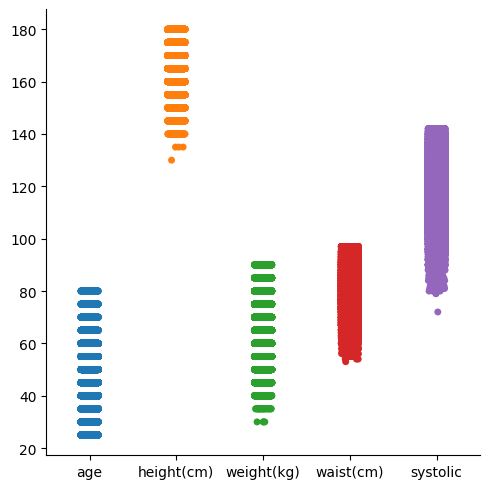

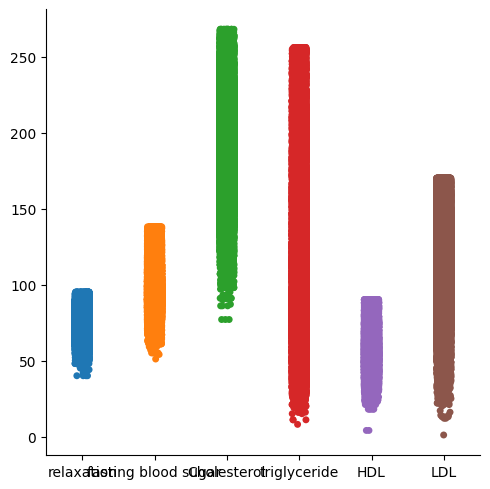

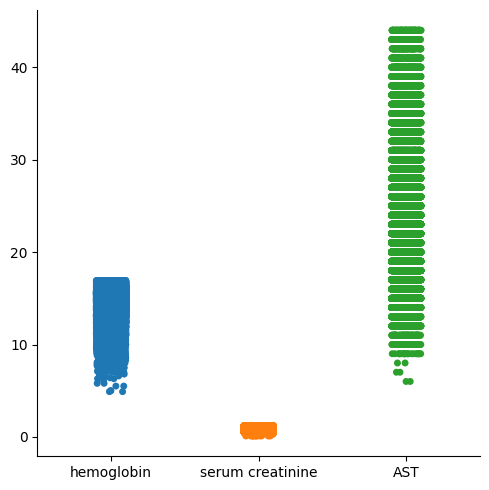

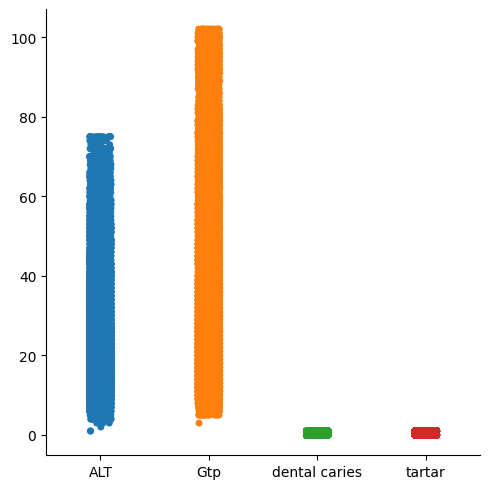

In [800]:
#CatPlots
sns.catplot(balanced_df.iloc[:, 0:5])
sns.catplot(balanced_df.iloc[:, 5:11])
sns.catplot(balanced_df.iloc[:, 11:14])
sns.catplot(balanced_df.iloc[:, 14:18])

### Scaled BoxPlot


### Scaled HeatMap

<AxesSubplot: >

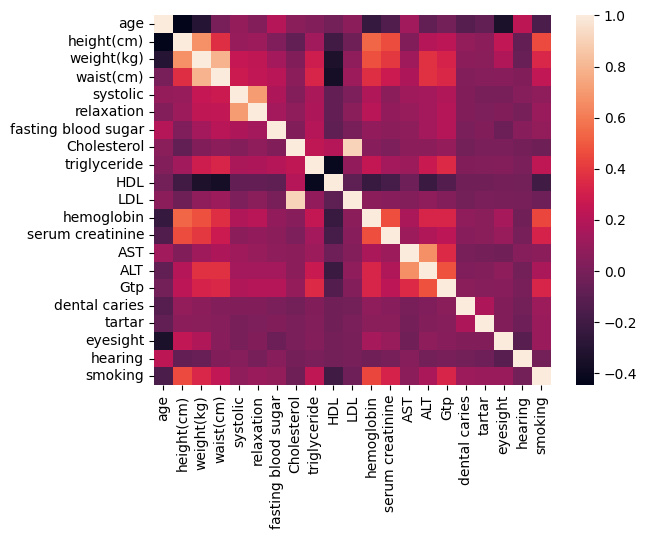

In [801]:
#HeatMap
corelation=balanced_df.corr()
sns.heatmap(corelation)

<AxesSubplot: ylabel='smoking'>

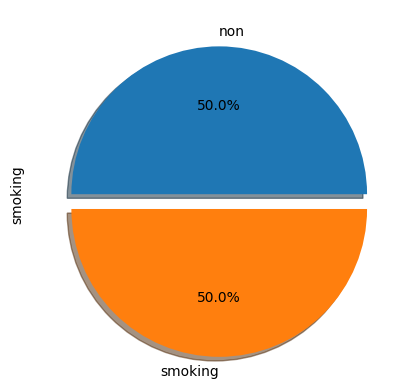

In [802]:

balanced_df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

### Balanced dataframe correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

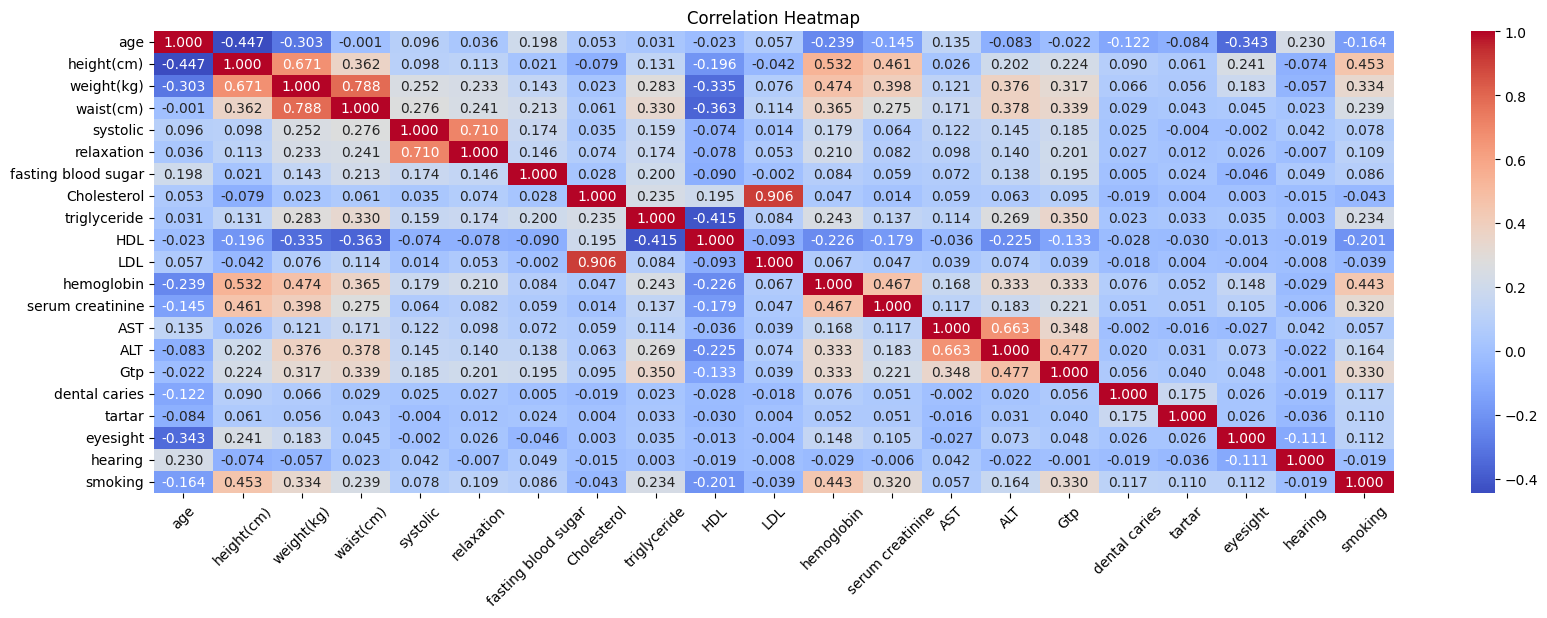

In [803]:
correlation_matrix = balanced_df.corr()
column_names = balanced_df.columns.tolist()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 6))
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)
plt.title('Correlation Heatmap')

# FEATURE SELECTION

In [804]:
# Lets find how many features are needed using a loop and 5 different feature selection method
feature_count = 12 # will go to 8
RFC = RandomForestClassifier(n_estimators=50, n_jobs=-1)
model_list = {
    'Logistic': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Ridge': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'chi2': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Lasso': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'mutual': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'PCA': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'RFC': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'KNN': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Stacking': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Max_voting': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Deep_learning': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0}
}

for key in model_list:
    model_list[key]['accuracy'] = 0

def add_list(model_name, test_data, pred_data, feature_count):

  precision = precision_score(test_data, pred_data)
  recall = recall_score(test_data, pred_data)
  f1 = f1_score(test_data, pred_data)

  roc_auc = roc_auc_score(test_data, pred_data)
  accuracy = accuracy_score(test_data, pred_data)

  # Assign these values to the model dictionary
  model_list[model_name]['precision'] = precision
  model_list[model_name]['recall'] = recall
  model_list[model_name]['f1'] = f1
  model_list[model_name]['feature_count'] = feature_count
  model_list[model_name]['roc_auc'] = roc_auc
  model_list[model_name]['accuracy'] = accuracy

### Ridge

In [805]:
ridge = Ridge(alpha=1.0).fit(X_standard, Y)

# Get the non-zero coefficients
feature_importances = np.abs(ridge.coef_)
# Retrieve the column names from the original data
selected_features = np.argsort(feature_importances)[::-1][:17]
X_ridge = X_standard[selected_features]
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, Y, test_size=0.2, random_state=42)
RFC.fit(X_train_ridge, y_train_ridge)


y_pred_ridge = RFC.predict(X_test_ridge)

add_list('Ridge', y_test_ridge, y_pred_ridge, X_ridge.shape[1])
print(X_ridge.shape[1])

17


### Lasso

In [806]:
lasso = Lasso(alpha=0.004)
lasso.fit(X_standard, Y)

# Get feature which does not have coeffient 0
selected_features = X_standard.columns[lasso.coef_ != 0]
X_lasso = X_standard[selected_features]
X_train_lasso, X_test_lasso, y_train_lasoo, y_test_lasso = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)
RFC.fit(X_train_lasso, y_train_lasoo)


y_pred_lasso = RFC.predict(X_test_lasso)

add_list('Lasso', y_test_lasso, y_pred_lasso, X_lasso.shape[1])
print(X_lasso.shape[1])

16


### Chi2 and mutual_info with SelectKBest

In [807]:
def RFC_train_test_SelectKBest(method, feature_count, X, Y, name):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list[name]['accuracy']:
        add_list(name, y_test, y_pred, feature_count)
    


feature_count = 20
while feature_count > 15:
    RFC_train_test_SelectKBest(chi2, feature_count, X_min_max, Y, 'chi2')
    RFC_train_test_SelectKBest(mutual_info_classif, feature_count, X_min_max, Y, 'mutual')
    feature_count -= 1


### PCA


In [808]:
# Apply PCA
pipe = make_pipeline(PCA(n_components=5), RFC)

# Specify the number of folds for K-fold cross-validation
k_folds = 20

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validatio
accuracy_scores=[]
for train_index, test_index in kf.split(X_ridge):
    X_train, X_test = X_ridge.to_numpy()[train_index], X_ridge.to_numpy()[test_index]
    y_train, y_test = Y.to_numpy()[train_index], Y.to_numpy()[test_index]
    
    # Train the model on the training fold
    pipe.fit(X_train, y_train)
    
    # Predict on the validation fold
    predictions = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)

    if accuracy >= model_list['PCA']['accuracy']:
        add_list('PCA', y_test, predictions, 5)



### RFC

In [809]:
def RFC_train_test_RFC(X, Y, feature_count):
    RFC.fit(X, Y)

    # Access feature importances
    feature_importances = RFC.feature_importances_

    # Sort the features
    sorted_feature_indices = feature_importances.argsort()[::-1]

    selected_feature_indices = sorted_feature_indices[:feature_count]

    # Select specified features within cuDF
    X_selected = X_standard.iloc[:, selected_feature_indices]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list['RFC']['accuracy']:
        add_list('RFC', y_test, y_pred, feature_count)

feature_count = 18
while feature_count < 21:
    RFC_train_test_RFC(X_standard, Y, feature_count)
    feature_count += 1


In [810]:
def logistic_chi(method, feature_count, X, Y, LR):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list['Logistic']['accuracy']:
        add_list('Logistic', y_test, y_pred, feature_count)

### Logisctic Reggression

In [811]:
#Logistic Regression Here
X_train, X_test, y_train, y_test = train_test_split(X_ridge, Y, test_size=0.2, random_state=42)
Logistic_model = LogisticRegression(max_iter=10000)


# Iterate the logictic reggersion for the different number of features
feature_count = 19
while feature_count > 10:
    logistic_chi(chi2, feature_count, X_min_max, Y,Logistic_model)
    feature_count -= 1


### KNN


In [812]:
#KNN here  
X_train, X_test, y_train, y_test = train_test_split(X_min_max, Y, test_size=0.2, random_state=42)    
accuracy_knn = []
# Itare over 3 to 15 neigbors to find best n_neighbors
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_knn.append(accuracy_score(y_test, pred_i))

  accuracy = accuracy_score(y_test, pred_i)


  if accuracy >= model_list['KNN']['accuracy']:
    add_list('KNN', y_test, pred_i, i)      



### Max voting

In [813]:
#Max voting here
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier(n_estimators=150,random_state=42)
RFC_2 = RandomForestClassifier(n_estimators=200, max_depth=20)

final_model = VotingClassifier(n_jobs=-1, estimators=[ ('rf', RFC),('dt', DTC ),('gb', GBC), ('rf2', RFC_2)  ])
 
# training all the model on the train dataset
x_train, x_test, y_train, y_test = train_test_split(X_ridge, Y, test_size=0.2, random_state=42)
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
add_list('Max_voting', y_test, pred_final, x_train.shape[1])


### Stacking

In [814]:
#Stack the methods with hyper paramaters
base_models = [
    ('logistic', LogisticRegression(max_iter=500)),
    ('KNN', KNeighborsClassifier(n_neighbors=1)),
    ('random_forest', RandomForestClassifier(n_estimators=120)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=120)),
    ('Extra', ExtraTreesClassifier(n_estimators=120)),
    ('adaboost', AdaBoostClassifier(n_estimators=120))  
]

stacked_model = StackingClassifier(estimators = base_models, n_jobs=-1, final_estimator=RandomForestClassifier(n_estimators=110))
x_train, x_test, y_train, y_test = train_test_split(X_ridge, Y, test_size=0.2, random_state=42)


# Train the stacking model
stacked_model.fit(x_train, y_train) 

# Make predictions
stacked_predictions = stacked_model.predict(x_test)

add_list('Stacking', y_test, stacked_predictions, x_train.shape[1])


### Deep Learning

In [1224]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")



def add_noise(data, noise_factor=0.1):
    noise = np.random.normal(scale=noise_factor, size=data.shape)
    augmented_data = data + noise
    return augmented_data

# Augment the training data by adding noise Gaussian
augmented_x_train = add_noise(X_ridge, noise_factor=0.15)

# Combine original and augmented data
combined_x= np.vstack((X_ridge, augmented_x_train))
combined_y = np.hstack((Y, Y))

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(combined_x, combined_y, test_size=0.2)


model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
# Classification layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model 
model.fit(X_train_dl, y_train_dl, batch_size=512, epochs=50, validation_data=(X_test_dl, y_test_dl))


1 Physical GPUs, 1 Logical GPU
Epoch 1/50
152/152 [==============================] - 1s 6ms/step - loss: 0.4861 - accuracy: 0.7668 - val_loss: 0.4669 - val_accuracy: 0.7792
Epoch 2/50
152/152 [==============================] - 1s 5ms/step - loss: 0.4625 - accuracy: 0.7823 - val_loss: 0.4557 - val_accuracy: 0.7818
Epoch 3/50
152/152 [==============================] - 1s 5ms/step - loss: 0.4443 - accuracy: 0.7905 - val_loss: 0.4456 - val_accuracy: 0.7901
Epoch 4/50
152/152 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.8012 - val_loss: 0.4292 - val_accuracy: 0.8011
Epoch 5/50
152/152 [==============================] - 1s 6ms/step - loss: 0.4035 - accuracy: 0.8134 - val_loss: 0.4101 - val_accuracy: 0.8101
Epoch 6/50
152/152 [==============================] - 1s 5ms/step - loss: 0.3804 - accuracy: 0.8264 - val_loss: 0.3936 - val_accuracy: 0.8209
Epoch 7/50
152/152 [==============================] - 1s 5ms/step - loss: 0.3533 - accuracy: 0.8417 - val_loss: 0.372

In [1225]:
y_predict_dl = model.predict(X_test_dl, batch_size=16)
threshold = 0.6 # Define threshold
y_predict_binary = np.where(y_predict_dl >= threshold, 1, 0)
add_list('Deep_learning',y_test_dl, y_predict_binary, X_train_dl.shape[1])
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_predict_binary, y_test_dl)

1213/1213 [==============================] - 2s 1ms/step


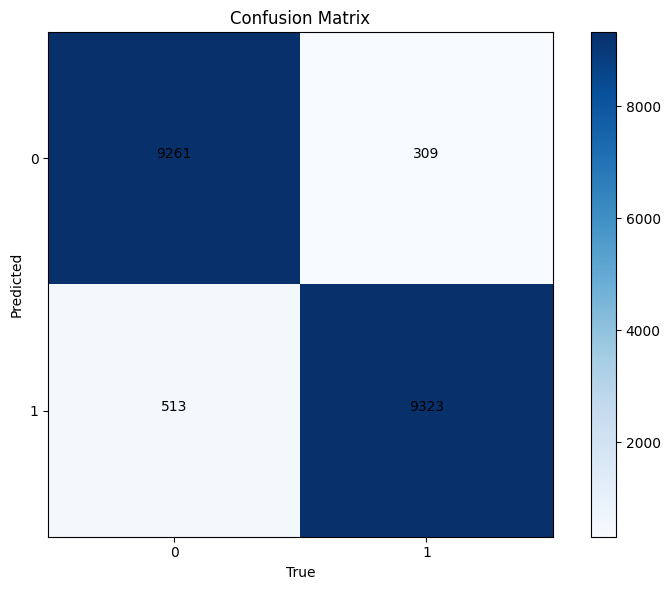

In [1226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [0,1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Predicted')
plt.xlabel('True')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="black")

plt.tight_layout()
plt.show()

In [1227]:
best_method = None
best_acc = 0

for method, info in model_list.items():
    acc = info['accuracy']
    if acc > best_acc:
        best_method = method
        best_acc = acc
    print(f"{method} has accuracy={info['accuracy']:.4f} roc_auc={info['roc_auc']:.4f}, f1={info['f1']:.4f}, precision={info['precision']:.4f}, recall={info['recall']:.4f}, feature_count={info['feature_count']}")

print(f"The best feature selection method is '{best_method}' with an accuracy of {best_acc:.4f} and feature count {model_list[best_method]['feature_count']}")

Logistic has accuracy=0.7546 roc_auc=0.7557, f1=0.7612, precision=0.7252, recall=0.8009, feature_count=19
Ridge has accuracy=0.9090 roc_auc=0.9101, f1=0.9114, precision=0.8689, recall=0.9582, feature_count=17
chi2 has accuracy=0.9111 roc_auc=0.9121, f1=0.9132, precision=0.8725, recall=0.9578, feature_count=20
Lasso has accuracy=0.9091 roc_auc=0.9103, f1=0.9116, precision=0.8682, recall=0.9595, feature_count=16
mutual has accuracy=0.9094 roc_auc=0.9105, f1=0.9116, precision=0.8702, recall=0.9571, feature_count=19
PCA has accuracy=0.9176 roc_auc=0.9176, f1=0.9211, precision=0.8821, recall=0.9637, feature_count=5
RFC has accuracy=0.9097 roc_auc=0.9109, f1=0.9122, precision=0.8688, recall=0.9601, feature_count=18
KNN has accuracy=0.8900 roc_auc=0.8911, f1=0.8927, precision=0.8525, recall=0.9369, feature_count=1
Stacking has accuracy=0.9379 roc_auc=0.9374, f1=0.9351, precision=0.9541, recall=0.9168, feature_count=17
Max_voting has accuracy=0.9056 roc_auc=0.9068, f1=0.9084, precision=0.8627,

In [1228]:
model_df = pd.DataFrame.from_dict(model_list, orient='index')
model_df = model_df.drop(['feature_count'],axis=1)

# Print the DataFrame
print(model_df)

                     f1  precision    recall   roc_auc  accuracy
Logistic       0.761160   0.725153  0.800929  0.755680  0.754612
Ridge          0.911354   0.868874  0.958201  0.910132  0.908997
chi2           0.913153   0.872500  0.957779  0.912136  0.911058
Lasso          0.911552   0.868195  0.959468  0.910262  0.909100
mutual         0.911632   0.870250  0.957146  0.910510  0.909409
PCA            0.921073   0.882086  0.963666  0.917636  0.917560
RFC            0.912154   0.868768  0.960101  0.910880  0.909719
KNN            0.892688   0.852478  0.936880  0.891114  0.890034
Stacking       0.935085   0.954086  0.916825  0.937369  0.937854
Max_voting     0.908437   0.862730  0.959257  0.906833  0.905596
Deep_learning  0.957777   0.947845  0.967919  0.957717  0.957642


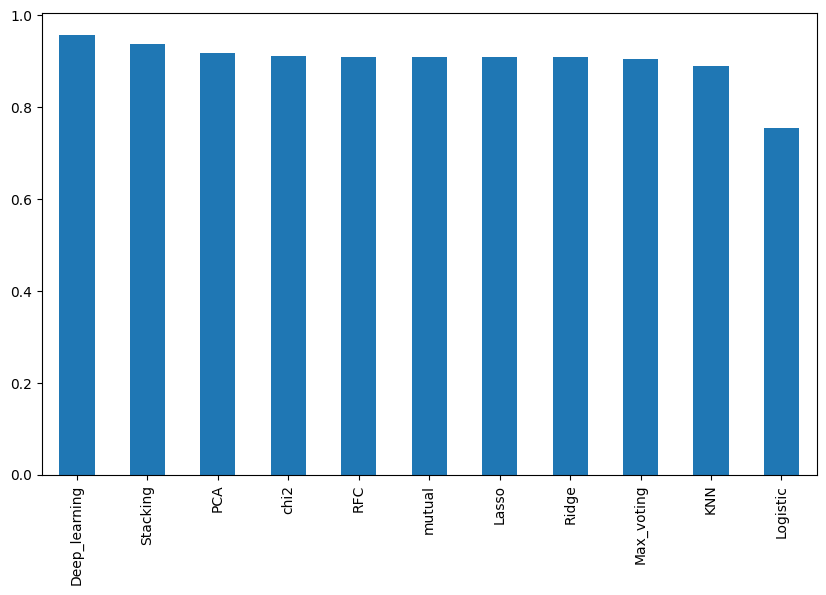

In [1229]:
model_df = model_df.sort_values(by='accuracy', ascending=False)
plt = model_df['accuracy'].plot(kind='bar', figsize=(10, 6))

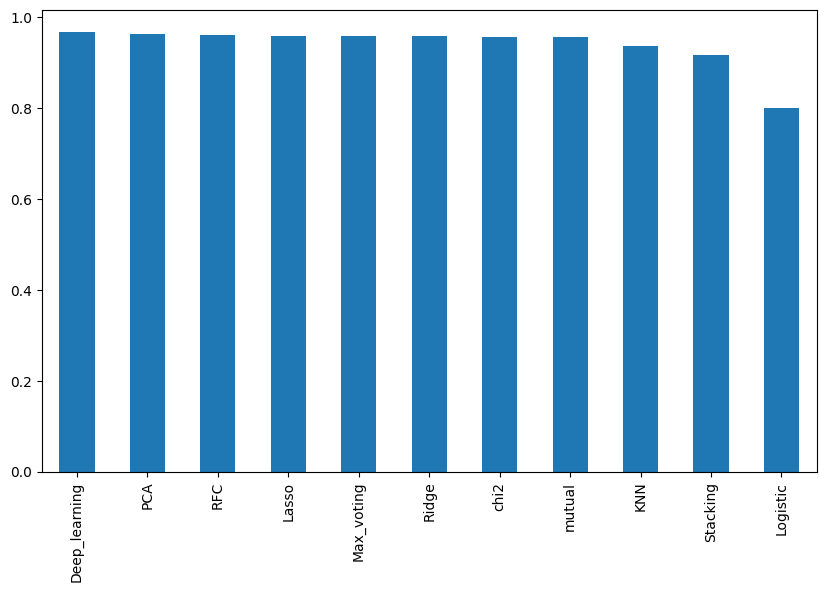

In [1230]:
model_df = model_df.sort_values(by='recall', ascending=False)
plt = model_df['recall'].plot(y='Recall score',kind='bar', figsize=(10, 6))

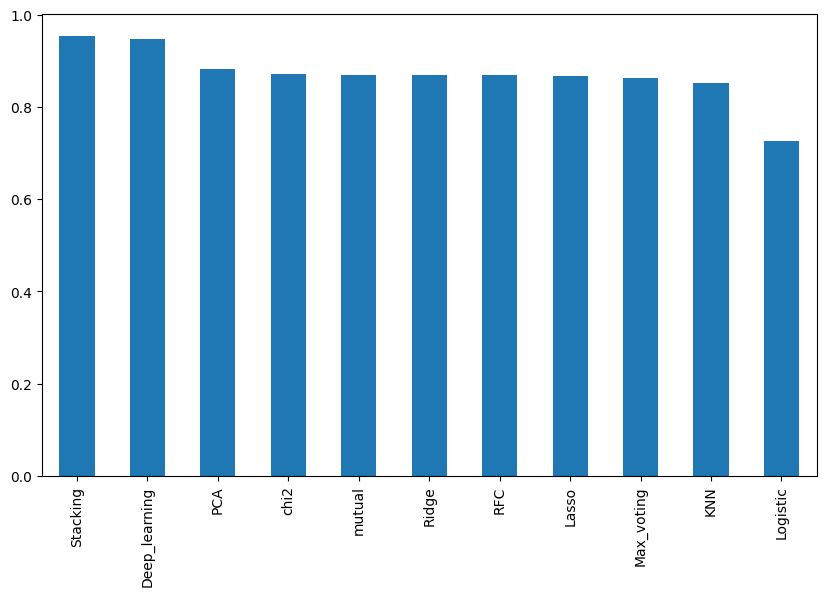

In [1231]:
model_df = model_df.sort_values(by='precision', ascending=False)
plt = model_df['precision'].plot(kind='bar', figsize=(10, 6))

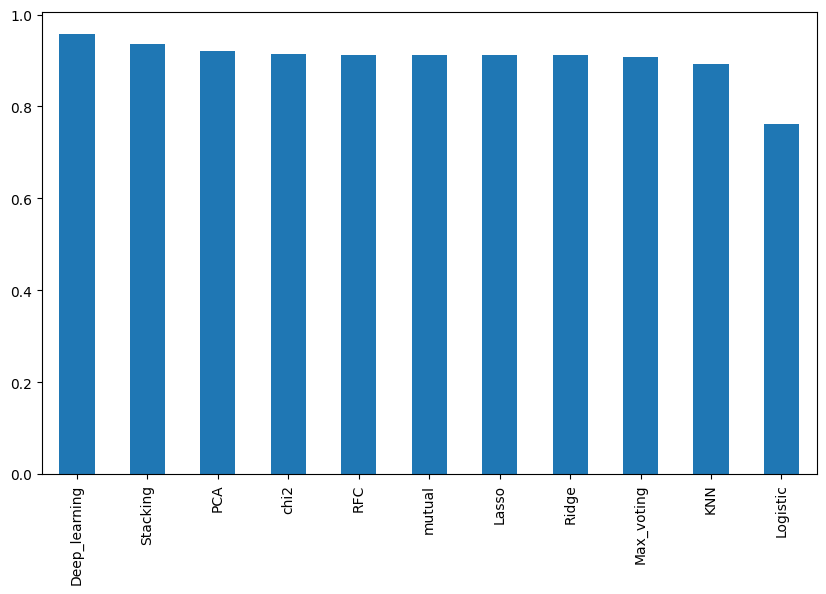

In [1232]:
model_df = model_df.sort_values(by='f1', ascending=False)
plt = model_df['f1'].plot(kind='bar', figsize=(10, 6))

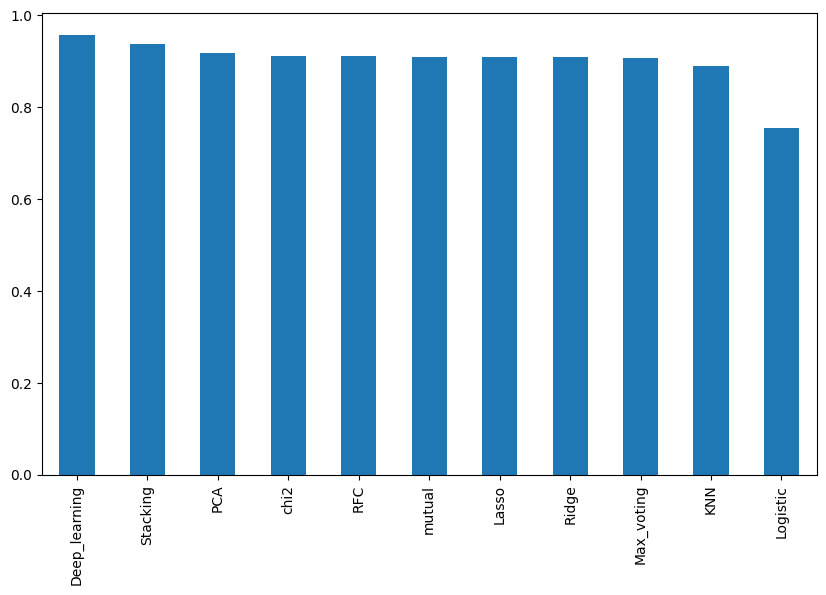

In [1233]:
model_df = model_df.sort_values(by='roc_auc', ascending=False)
plt = model_df['roc_auc'].plot(kind='bar', figsize=(10, 6))